In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning models
import lightgbm as lgb
import xgboost as xgb
# Model evaluation and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("diabetes (1).csv")

In [6]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (768, 9)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [8]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.00000

In [9]:
print("\nColumns in the dataset:")
print(df.columns.tolist())


Columns in the dataset:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [10]:
# Check for missing values
print("Missing Values in Each Column:")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_info[missing_info['Missing Count'] > 0])

Missing Values in Each Column:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


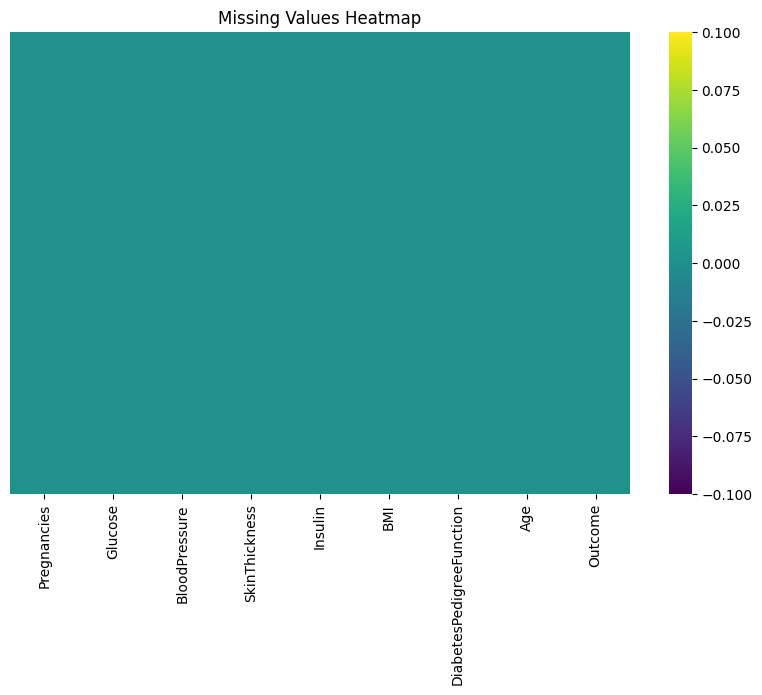

In [11]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

EDA DATA ANALYSIS-DISTRUBUTION

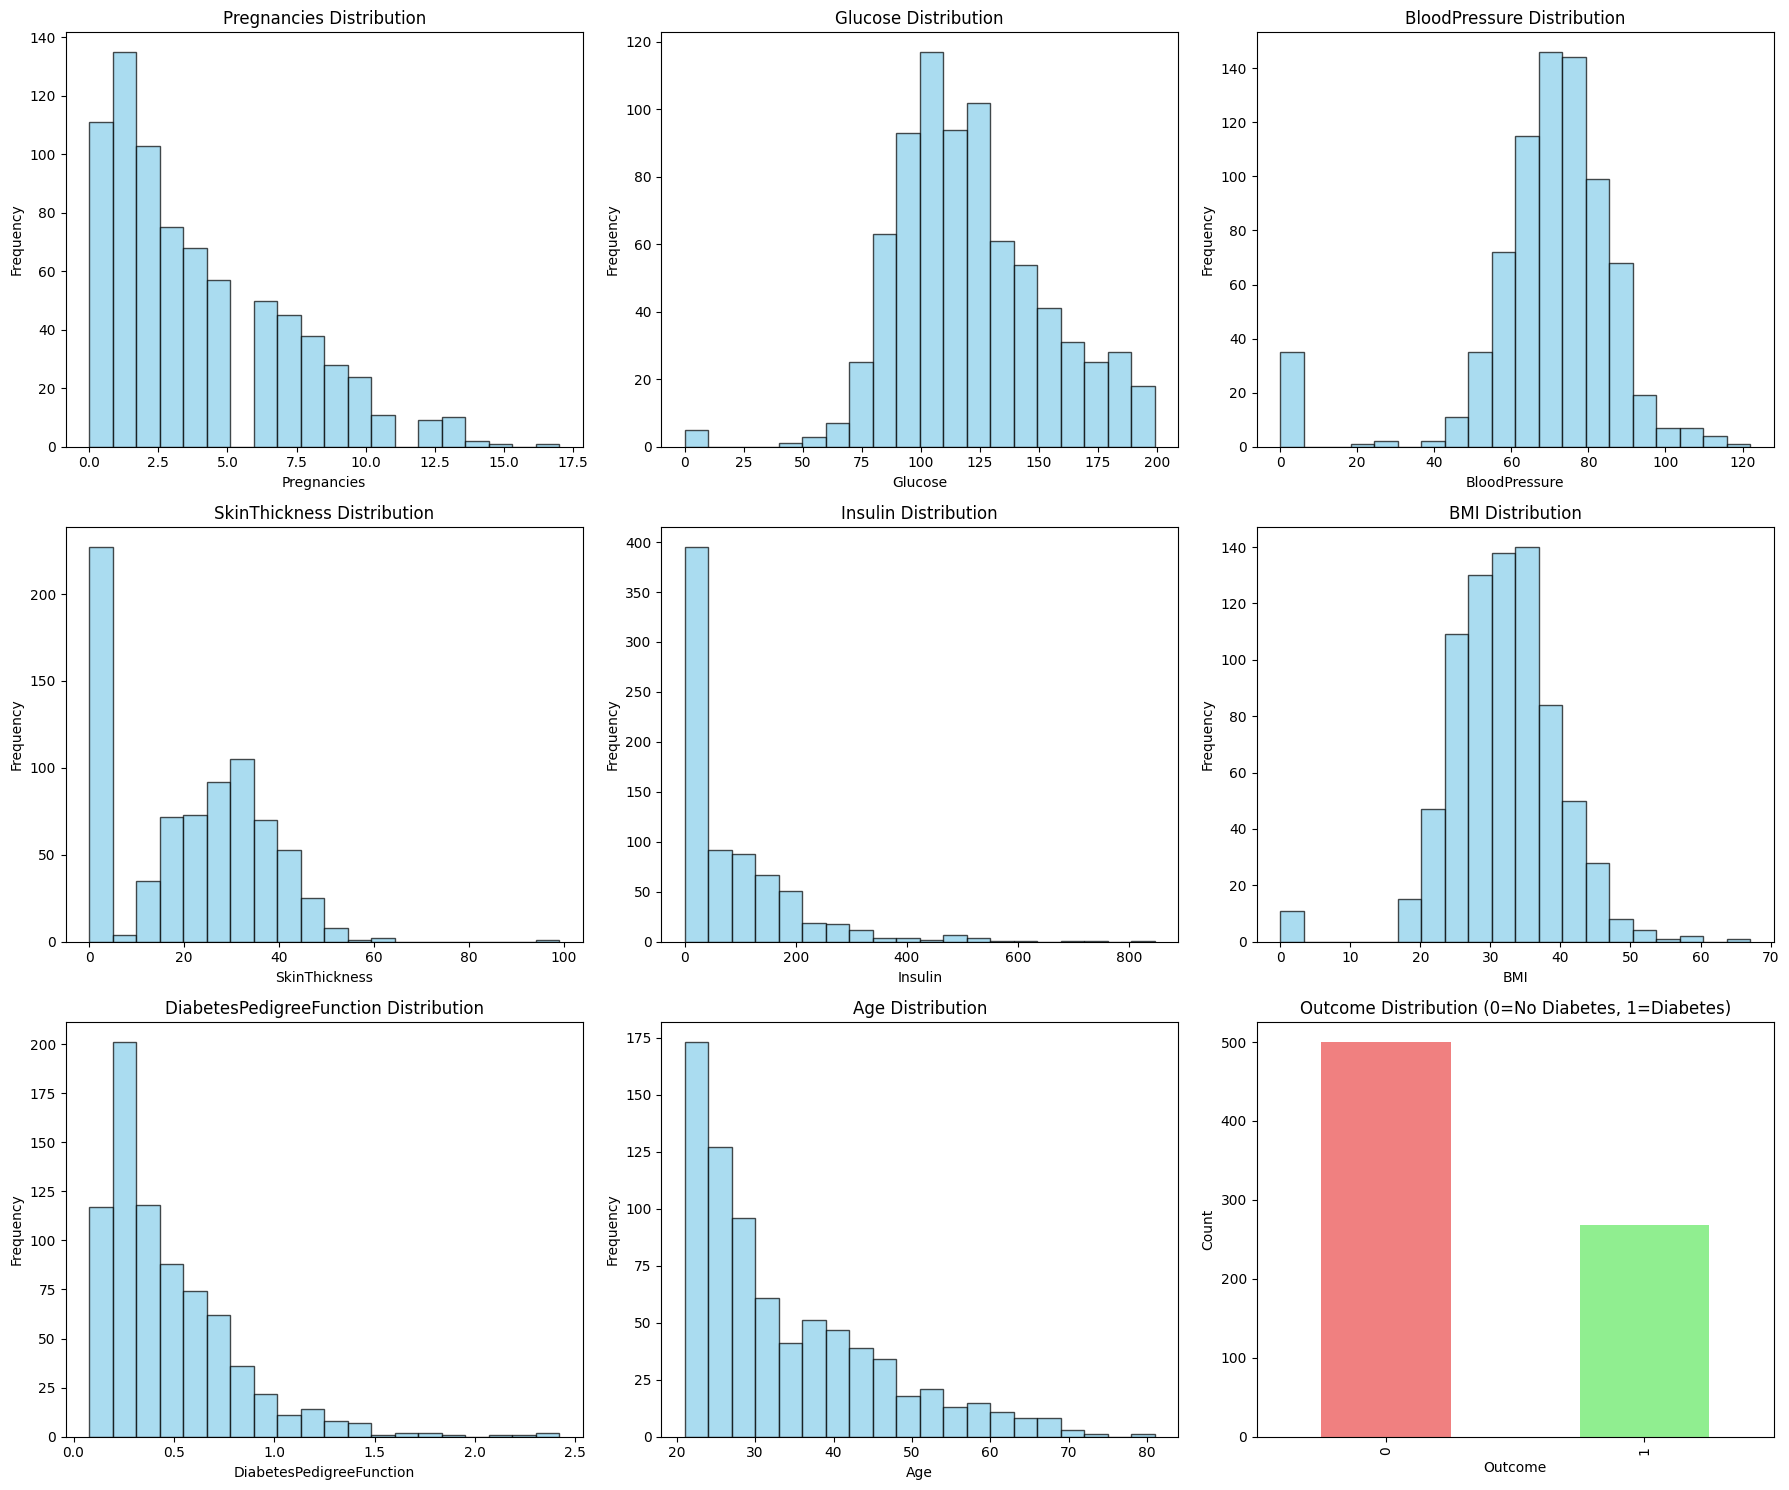

In [14]:
# Set up the plotting area
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# List of features to plot
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    axes[row, col].hist(df[feature], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

# Outcome distribution
df['Outcome'].value_counts().plot(kind='bar', ax=axes[2, 2], color=['lightcoral', 'lightgreen'])
axes[2, 2].set_title('Outcome Distribution (0=No Diabetes, 1=Diabetes)')
axes[2, 2].set_xlabel('Outcome')
axes[2, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

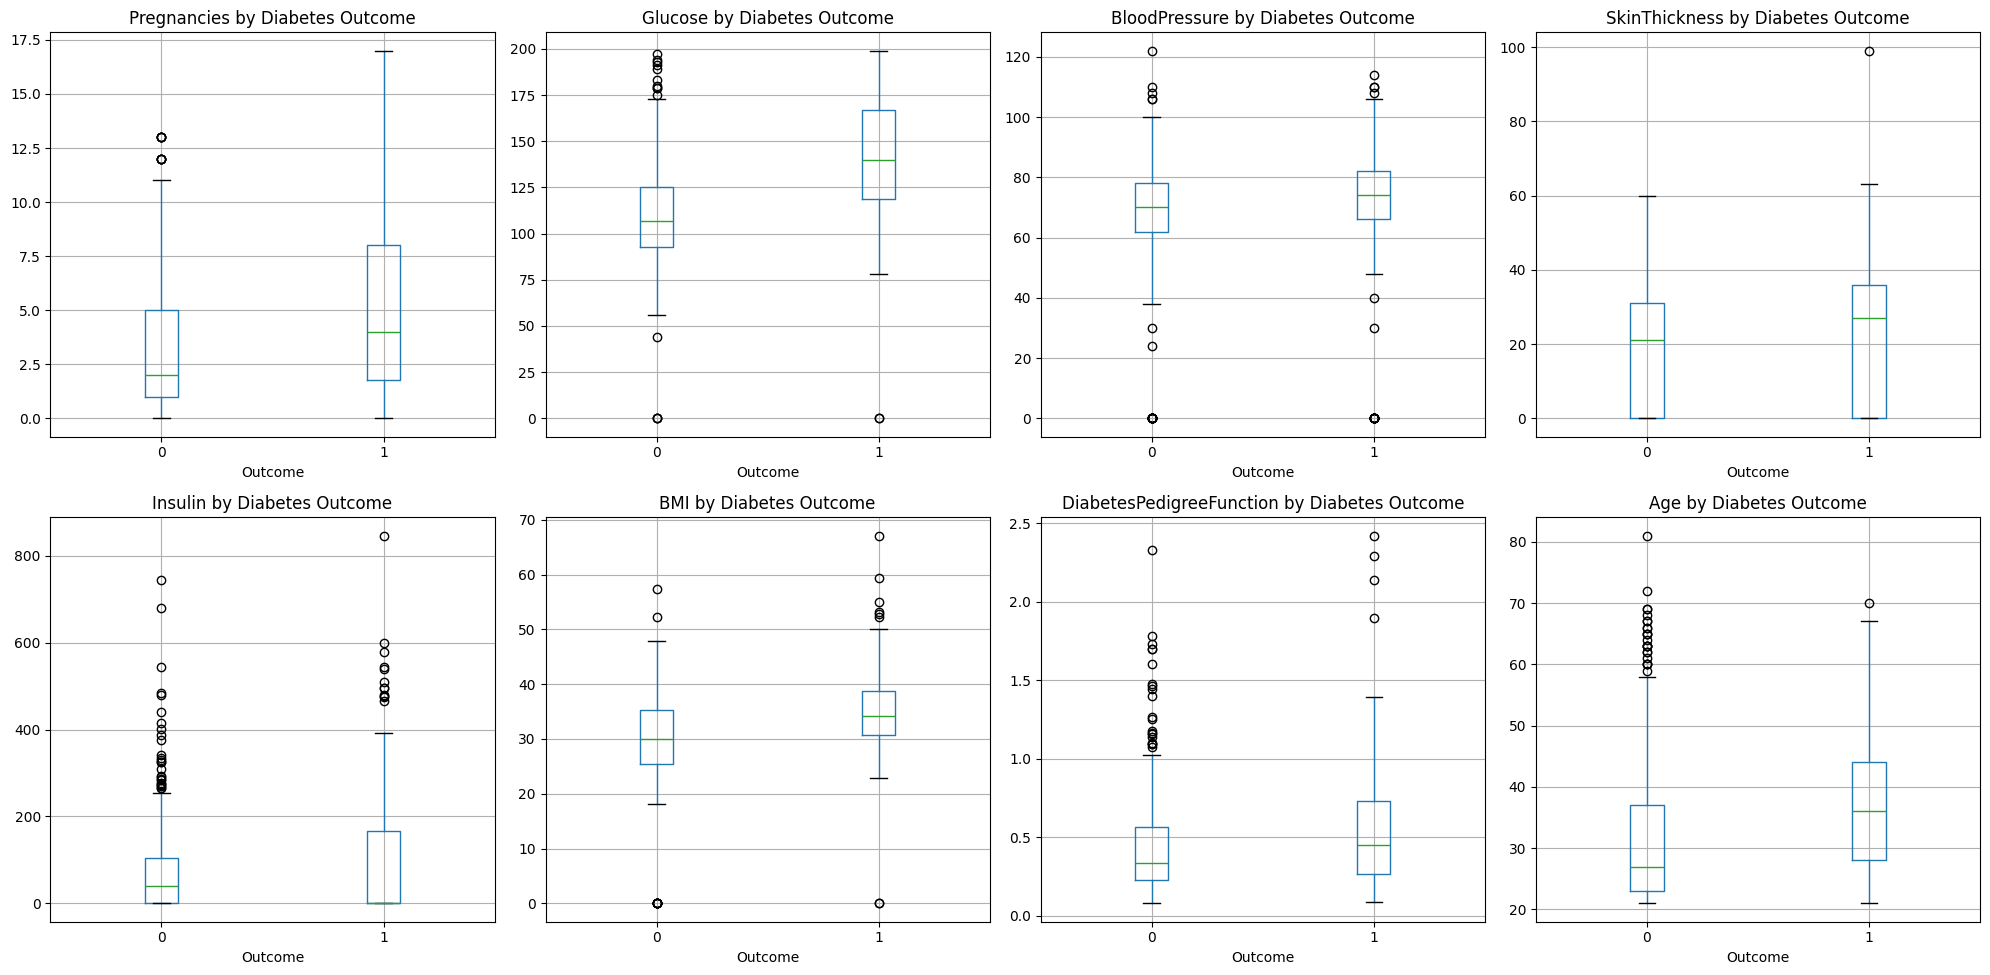

In [15]:
# Box plots for numerical features by outcome
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, feature in enumerate(features):
    row, col = i // 4, i % 4
    df.boxplot(column=feature, by='Outcome', ax=axes[row, col])
    axes[row, col].set_title(f'{feature} by Diabetes Outcome')

plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()

Relationships with Diabetes Outcome

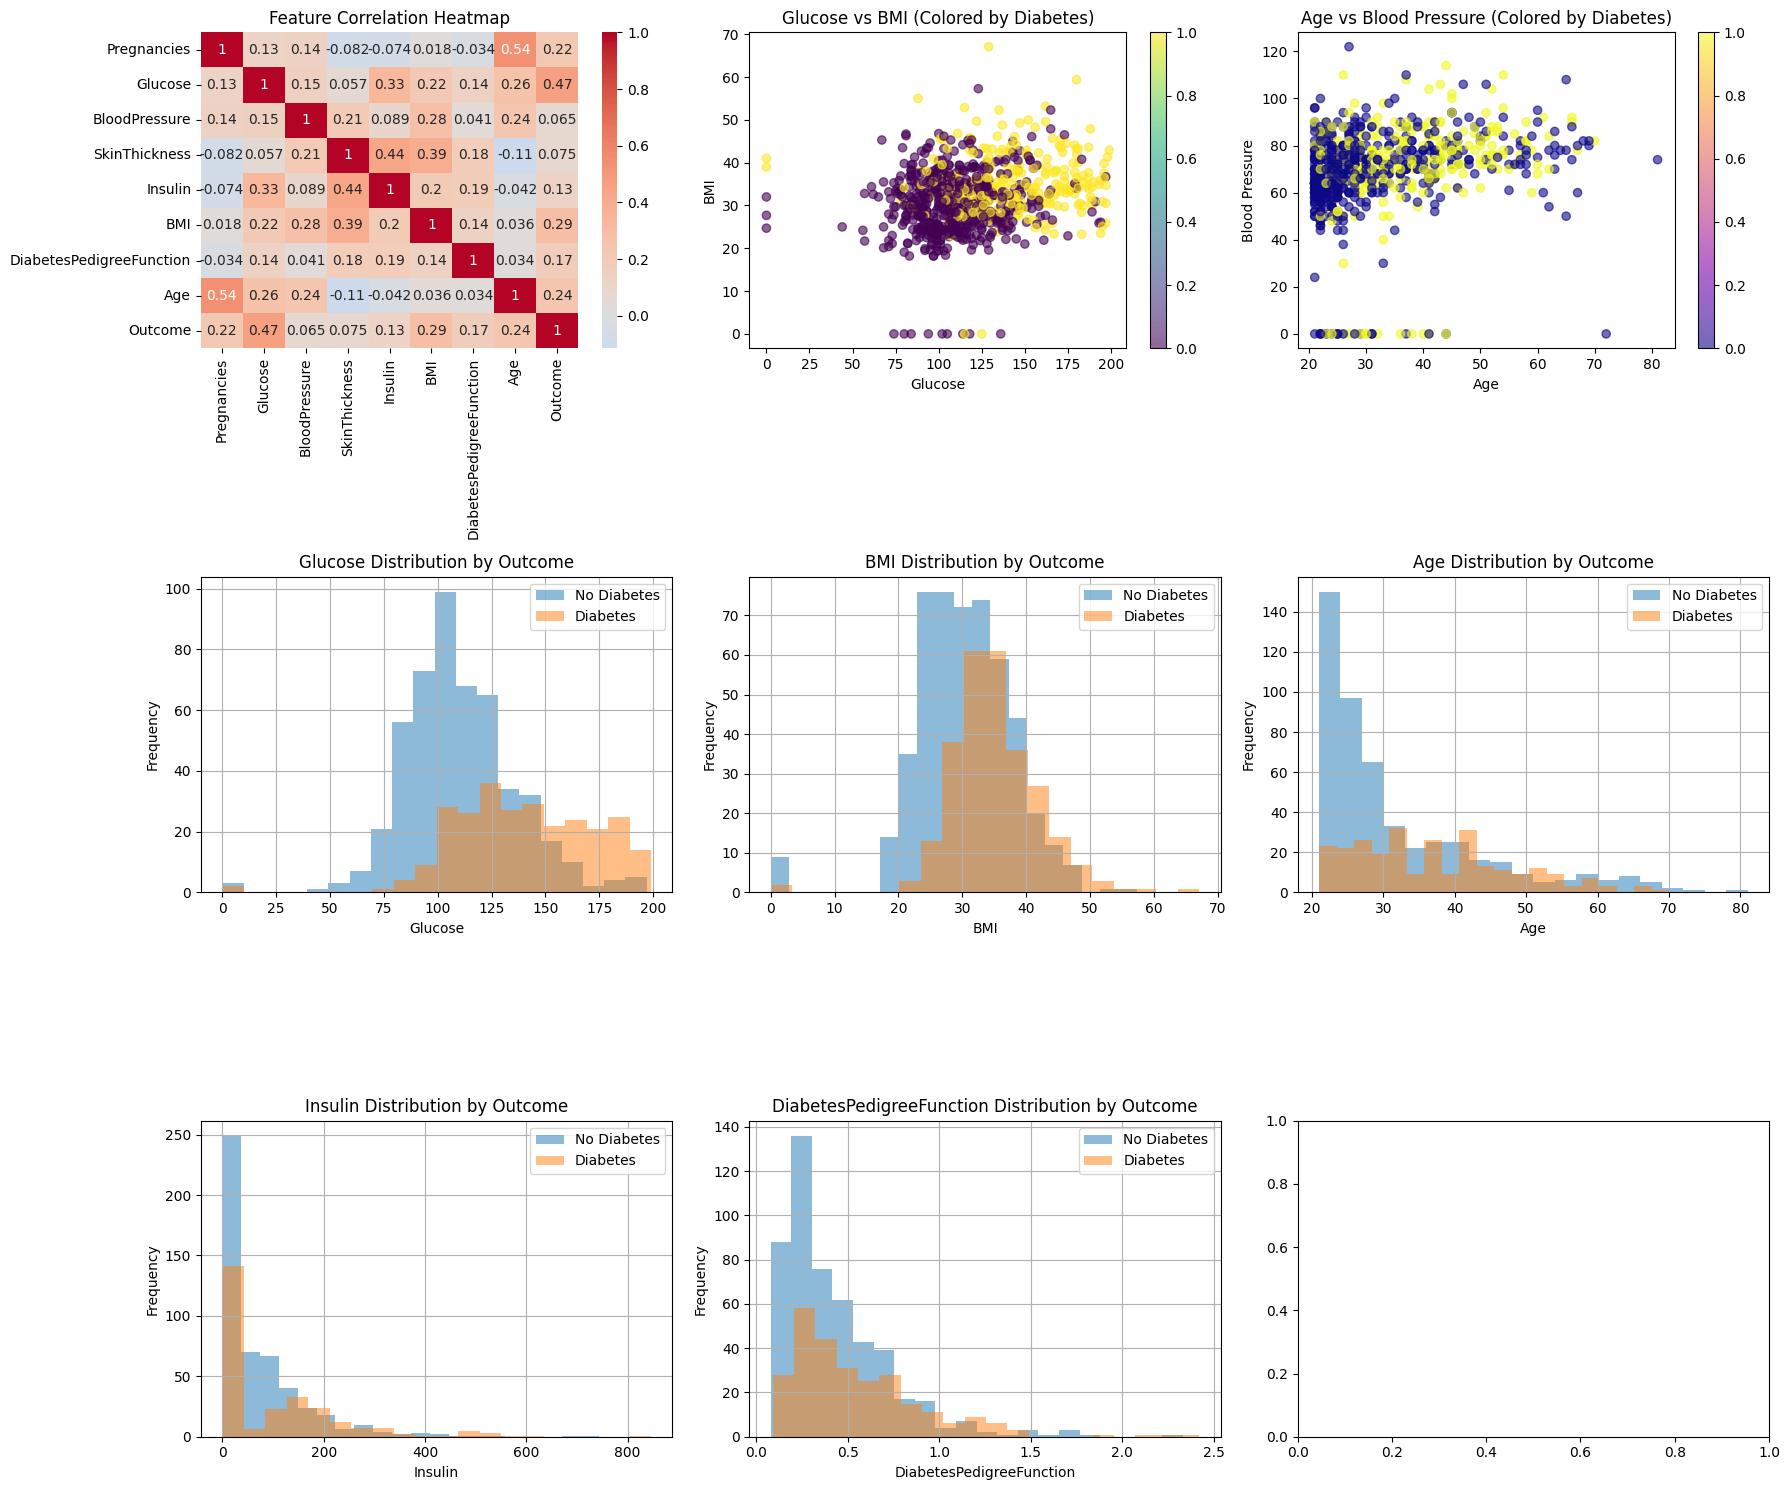

In [24]:
# Set up the plotting area
fig, axes = plt.subplots(3,3,figsize=(18, 15))

# 1. Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0,0])
axes[0,0].set_title('Feature Correlation Heatmap')


# 2. Glucose vs BMI colored by Outcome
scatter = axes[0,1].scatter(df['Glucose'], df['BMI'], c=df['Outcome'], alpha=0.6, cmap='viridis')
axes[0,1].set_title('Glucose vs BMI (Colored by Diabetes)')
axes[0,1].set_xlabel('Glucose')
axes[0,1].set_ylabel('BMI')
plt.colorbar(scatter, ax=axes[0,1])

# 3. Age vs BloodPressure colored by Outcome
scatter = axes[0,2].scatter(df['Age'], df['BloodPressure'], c=df['Outcome'], alpha=0.6, cmap='plasma')
axes[0,2].set_title('Age vs Blood Pressure (Colored by Diabetes)')
axes[0,2].set_xlabel('Age')
axes[0,2].set_ylabel('Blood Pressure')
plt.colorbar(scatter, ax=axes[0,2])

# 4-8. Feature distributions by outcome
features_for_plot = ['Glucose', 'BMI', 'Age', 'Insulin', 'DiabetesPedigreeFunction']
for i, feature in enumerate(features_for_plot):
    row, col = (i+3) // 3, (i+3) % 3
    df[df['Outcome'] == 0][feature].hist(alpha=0.5, label='No Diabetes', ax=axes[row, col], bins=20)
    df[df['Outcome'] == 1][feature].hist(alpha=0.5, label='Diabetes', ax=axes[row, col], bins=20)
    axes[row, col].set_title(f'{feature} Distribution by Outcome')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

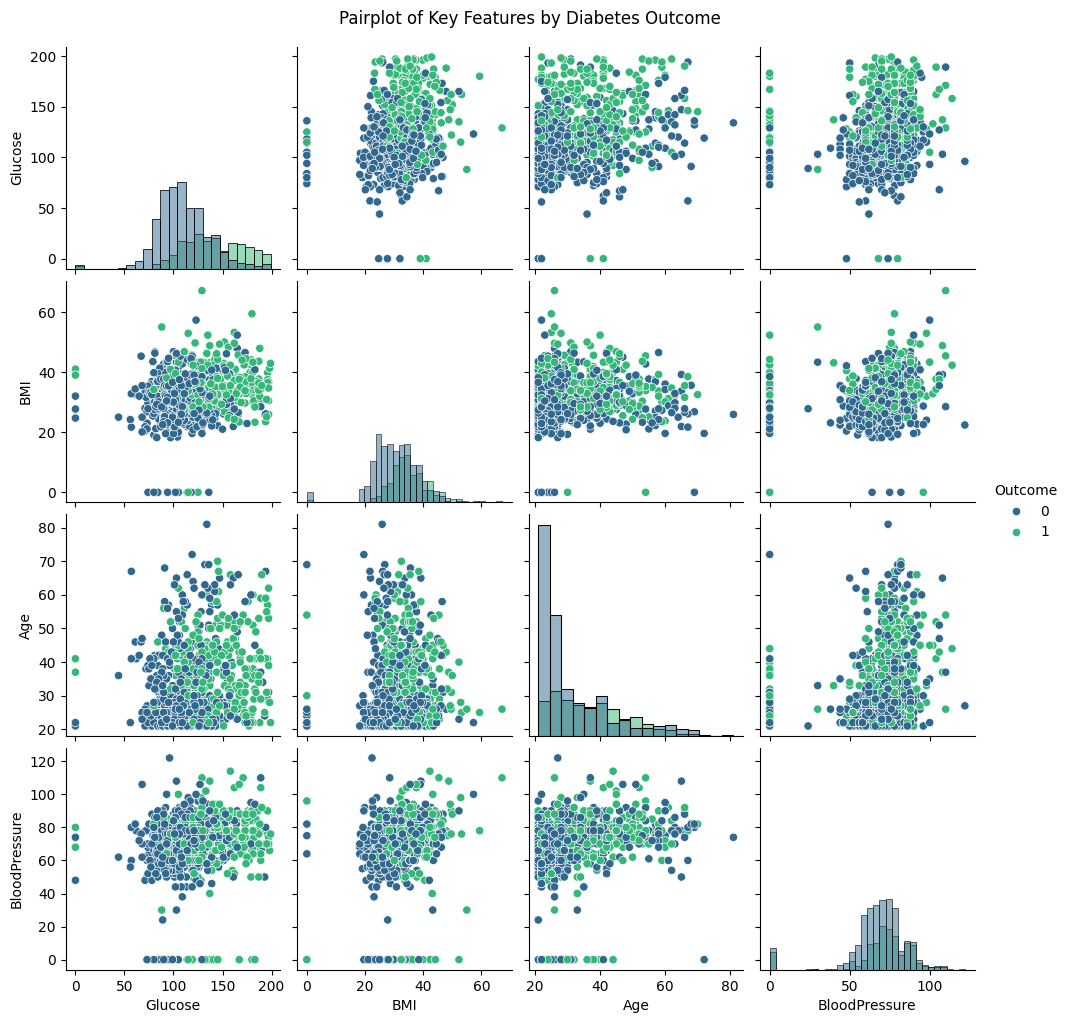

In [23]:
# Pairplot for key features
key_features = ['Glucose', 'BMI', 'Age', 'BloodPressure', 'Outcome']
sns.pairplot(df[key_features], hue='Outcome', palette='viridis', diag_kind='hist')
plt.suptitle('Pairplot of Key Features by Diabetes Outcome', y=1.02)
plt.show()

DATA PREPROCESSING

In [25]:
# Create a copy of the original dataframe for preprocessing
df_processed = df.copy()

print("Starting data preprocessing...")

# 1. Handle zeros in features (treat as missing values)
# Features where zero might indicate missing data
features_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for feature in features_with_zeros:
    # Replace zeros with NaN
    df_processed[feature] = df_processed[feature].replace(0, np.nan)
    print(f"Replaced zeros with NaN in {feature}")

# 2. Check missing values after zero replacement
print("\nMissing values after zero replacement:")
print(df_processed.isnull().sum())

# 3. Impute missing values
print("\nImputing missing values...")

# For Glucose, BloodPressure, BMI - use median (important clinical features)
median_impute_features = ['Glucose', 'BloodPressure', 'BMI']
for feature in median_impute_features:
    imputer = SimpleImputer(strategy='median')
    df_processed[feature] = imputer.fit_transform(df_processed[[feature]])

# For SkinThickness, Insulin - use median (more variable features)
median_impute_features2 = ['SkinThickness', 'Insulin']
for feature in median_impute_features2:
    imputer = SimpleImputer(strategy='median')
    df_processed[feature] = imputer.fit_transform(df_processed[[feature]])

# 4. Feature engineering
print("\nCreating new features...")

# Create BMI categories
df_processed['BMI_Category'] = pd.cut(df_processed['BMI'],
                                    bins=[0, 18.5, 25, 30, 100],
                                    labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Create age groups
df_processed['Age_Group'] = pd.cut(df_processed['Age'],
                                 bins=[0, 30, 45, 60, 100],
                                 labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])

# Create glucose categories
df_processed['Glucose_Category'] = pd.cut(df_processed['Glucose'],
                                        bins=[0, 100, 125, 200, 300],
                                        labels=['Normal', 'Prediabetes', 'Diabetes', 'High Diabetes'])

# Create interaction features
df_processed['Glucose_BMI_Interaction'] = df_processed['Glucose'] * df_processed['BMI']
df_processed['Age_Glucose_Interaction'] = df_processed['Age'] * df_processed['Glucose']

# 5. Encode categorical variables
print("Encoding categorical variables...")

# One-hot encoding for categorical features
categorical_features = ['BMI_Category', 'Age_Group', 'Glucose_Category']
df_processed = pd.get_dummies(df_processed, columns=categorical_features, prefix=categorical_features)

# 6. Scale numerical features (optional - tree-based models are scale-invariant)
scaler = StandardScaler()
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
                     'Glucose_BMI_Interaction', 'Age_Glucose_Interaction']

df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

print("Preprocessing completed!")
print("Processed dataset shape:", df_processed.shape)
print("\nProcessed dataset columns:")
print(df_processed.columns.tolist())

Starting data preprocessing...
Replaced zeros with NaN in Glucose
Replaced zeros with NaN in BloodPressure
Replaced zeros with NaN in SkinThickness
Replaced zeros with NaN in Insulin
Replaced zeros with NaN in BMI

Missing values after zero replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Imputing missing values...

Creating new features...
Encoding categorical variables...
Preprocessing completed!
Processed dataset shape: (768, 23)

Processed dataset columns:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Glucose_BMI_Interaction', 'Age_Glucose_Interaction', 'BMI_Category_Underweight', 'BMI_Category_Normal', 'BMI_Category_Overweight', 'BMI_Categor

Prepare Data for Modeling

In [26]:
# Separate features and target variable
X = df_processed.drop('Outcome', axis=1)
y = df_processed['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split completed!")
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Diabetes rate in training set: {y_train.mean():.3f}")
print(f"Diabetes rate in testing set: {y_test.mean():.3f}")

# Display feature names
print("\nFeatures used for modeling:")
for i, feature in enumerate(X.columns, 1):
    print(f"{i}. {feature}")

Data split completed!
Training set size: (614, 22)
Testing set size: (154, 22)
Diabetes rate in training set: 0.349
Diabetes rate in testing set: 0.351

Features used for modeling:
1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age
9. Glucose_BMI_Interaction
10. Age_Glucose_Interaction
11. BMI_Category_Underweight
12. BMI_Category_Normal
13. BMI_Category_Overweight
14. BMI_Category_Obese
15. Age_Group_Young
16. Age_Group_Middle-aged
17. Age_Group_Senior
18. Age_Group_Elderly
19. Glucose_Category_Normal
20. Glucose_Category_Prediabetes
21. Glucose_Category_Diabetes
22. Glucose_Category_High Diabetes


Build and Evaluate LightGBM Model

In [29]:
print("=== LightGBM Model ===")

# Initialize LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1, n_estimators=100)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)
auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)

print("LightGBM Performance Metrics:")
print(f"Accuracy:  {accuracy_lgb:.4f}")
print(f"Precision: {precision_lgb:.4f}")
print(f"Recall:    {recall_lgb:.4f}")
print(f"F1-Score:  {f1_lgb:.4f}")
print(f"AUC-ROC:   {auc_lgb:.4f}")

# Cross-validation
cv_scores_lgb = cross_val_score(lgb_model, X, y, cv=5, scoring='accuracy')
print(f"\nCross-validation Accuracy: {cv_scores_lgb.mean():.4f} (+/- {cv_scores_lgb.std() * 2:.4f})")

# Feature importance
lgb_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features (LightGBM):")
print(lgb_importance.head(10))

=== LightGBM Model ===
LightGBM Performance Metrics:
Accuracy:  0.7338
Precision: 0.6275
Recall:    0.5926
F1-Score:  0.6095
AUC-ROC:   0.8072

Cross-validation Accuracy: 0.7370 (+/- 0.0528)

Top 10 Most Important Features (LightGBM):
                    feature  importance
6  DiabetesPedigreeFunction         461
9   Age_Glucose_Interaction         384
8   Glucose_BMI_Interaction         331
5                       BMI         266
1                   Glucose         220
2             BloodPressure         200
7                       Age         178
0               Pregnancies         160
3             SkinThickness         132
4                   Insulin         127


Build and Evaluate XGBoost Model

In [30]:
print("=== XGBoost Model ===")

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss', n_estimators=100)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print("XGBoost Performance Metrics:")
print(f"Accuracy:  {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall:    {recall_xgb:.4f}")
print(f"F1-Score:  {f1_xgb:.4f}")
print(f"AUC-ROC:   {auc_xgb:.4f}")

# Cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print(f"\nCross-validation Accuracy: {cv_scores_xgb.mean():.4f} (+/- {cv_scores_xgb.std() * 2:.4f})")

# Feature importance
xgb_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features (XGBoost):")
print(xgb_importance.head(10))

=== XGBoost Model ===
XGBoost Performance Metrics:
Accuracy:  0.7403
Precision: 0.6296
Recall:    0.6296
F1-Score:  0.6296
AUC-ROC:   0.8046

Cross-validation Accuracy: 0.7488 (+/- 0.0731)

Top 10 Most Important Features (XGBoost):
                     feature  importance
8    Glucose_BMI_Interaction    0.213188
9    Age_Glucose_Interaction    0.106986
15     Age_Group_Middle-aged    0.086184
1                    Glucose    0.066457
6   DiabetesPedigreeFunction    0.065859
0                Pregnancies    0.064699
5                        BMI    0.063061
7                        Age    0.061651
4                    Insulin    0.058715
12   BMI_Category_Overweight    0.053174


Hyperparameter Tuning for Both Models

In [31]:
print("=== Hyperparameter Tuning ===")

# LightGBM hyperparameter tuning
print("Tuning LightGBM parameters...")
lgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 50, 70]
}

lgb_grid = GridSearchCV(lgb.LGBMClassifier(random_state=42, verbose=-1),
                       lgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
lgb_grid.fit(X_train, y_train)

print(f"Best LightGBM parameters: {lgb_grid.best_params_}")
print(f"Best LightGBM score: {lgb_grid.best_score_:.4f}")

# XGBoost hyperparameter tuning
print("\nTuning XGBoost parameters...")
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

xgb_grid = GridSearchCV(xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
                       xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print(f"Best XGBoost parameters: {xgb_grid.best_params_}")
print(f"Best XGBoost score: {xgb_grid.best_score_:.4f}")

# Train final models with best parameters
best_lgb = lgb_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_

# Evaluate tuned models
y_pred_lgb_tuned = best_lgb.predict(X_test)
y_pred_xgb_tuned = best_xgb.predict(X_test)

accuracy_lgb_tuned = accuracy_score(y_test, y_pred_lgb_tuned)
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)

print(f"\nTuned LightGBM Accuracy: {accuracy_lgb_tuned:.4f}")
print(f"Tuned XGBoost Accuracy: {accuracy_xgb_tuned:.4f}")

=== Hyperparameter Tuning ===
Tuning LightGBM parameters...
Best LightGBM parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'num_leaves': 31}
Best LightGBM score: 0.7590

Tuning XGBoost parameters...
Best XGBoost parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best XGBoost score: 0.7639

Tuned LightGBM Accuracy: 0.7403
Tuned XGBoost Accuracy: 0.7468


Comparative Analysis and Visualization

=== Model Comparison ===
              Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0          LightGBM  0.733766   0.627451  0.592593  0.609524  0.807222
1  LightGBM (Tuned)  0.740260   0.652174  0.555556  0.600000  0.814074
2           XGBoost  0.740260   0.629630  0.629630  0.629630  0.804630
3   XGBoost (Tuned)  0.746753   0.647059  0.611111  0.628571  0.819074


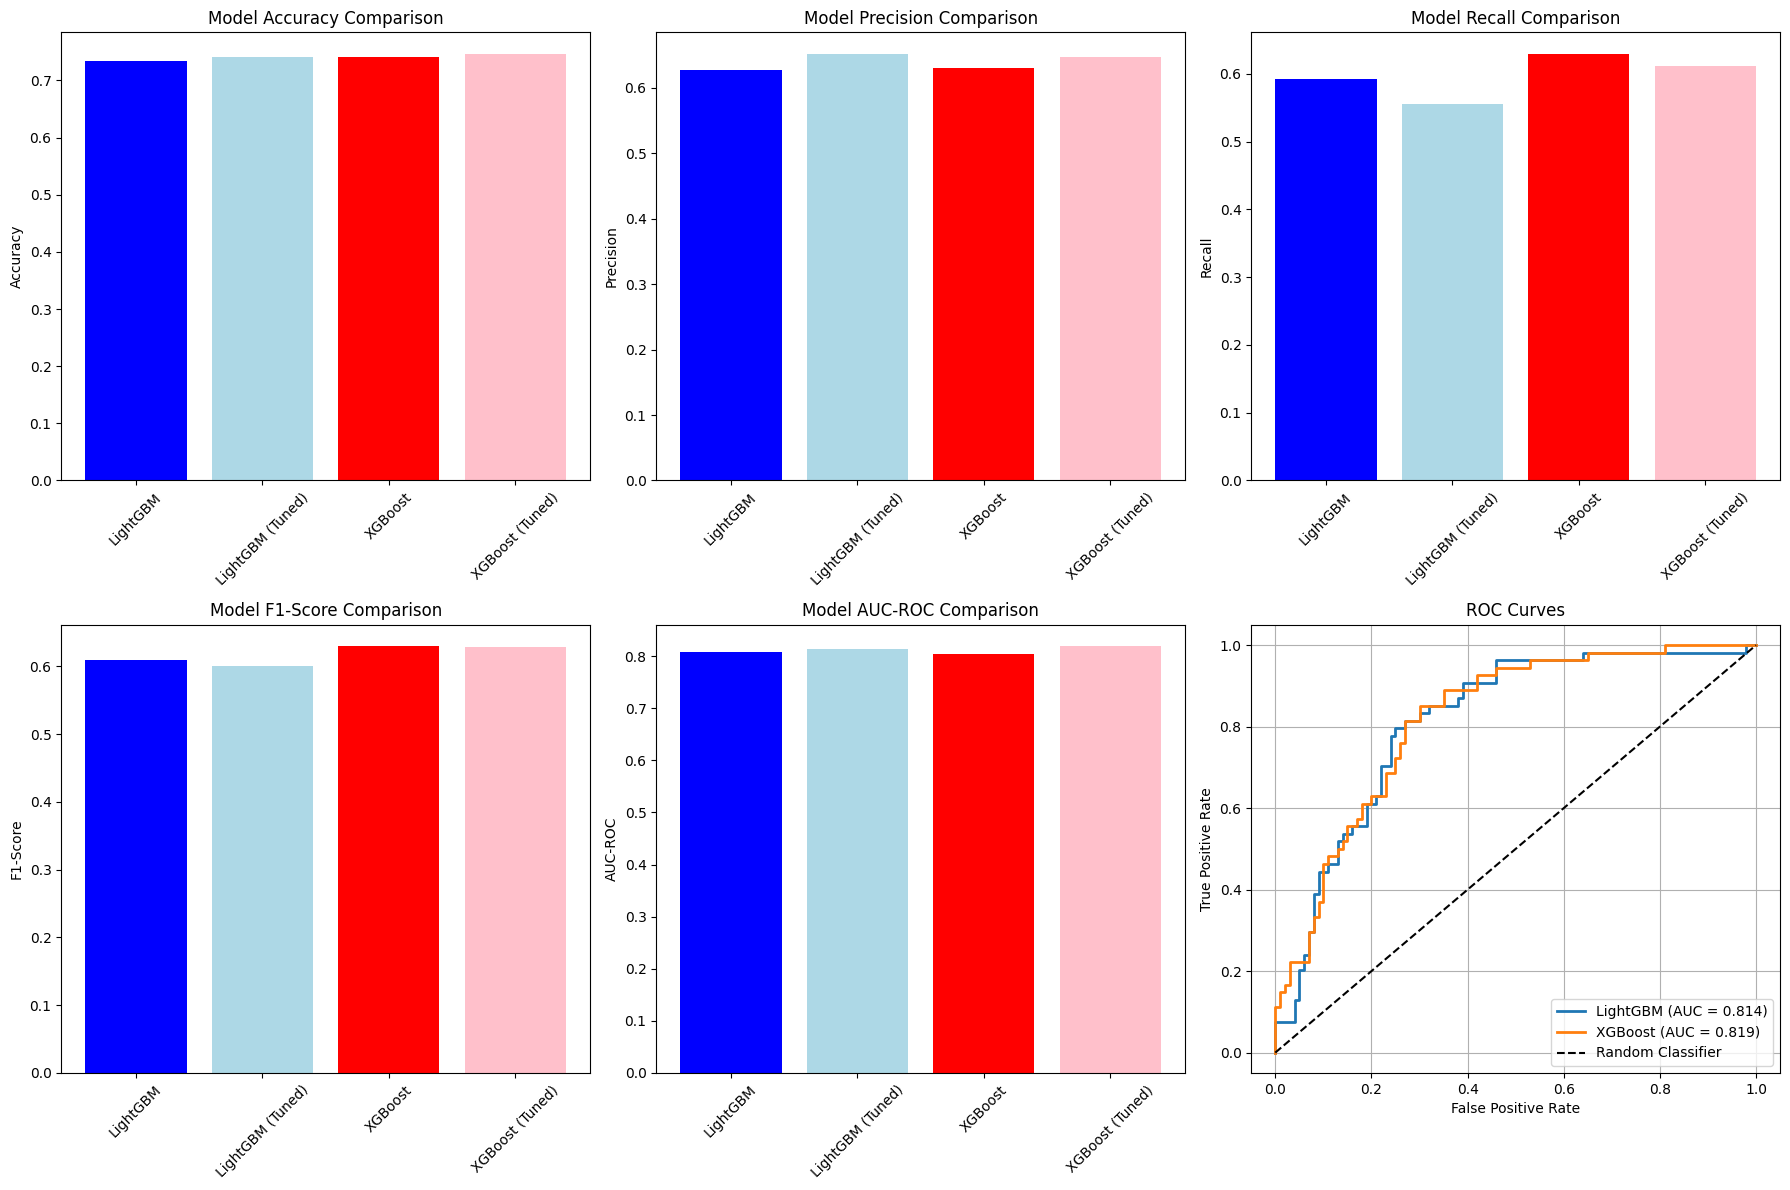

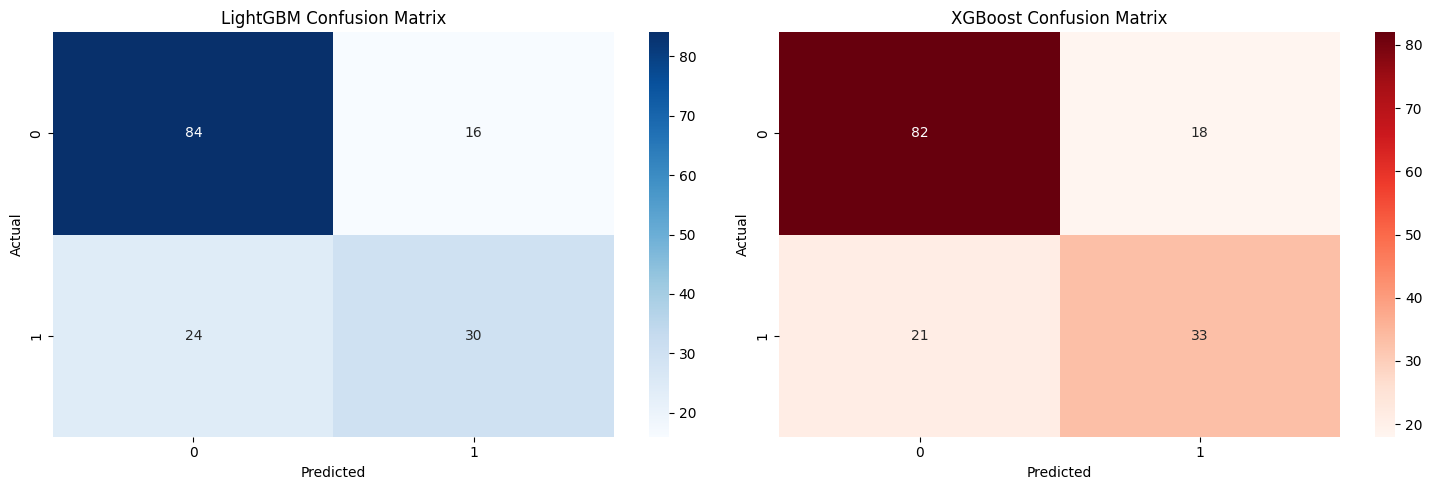

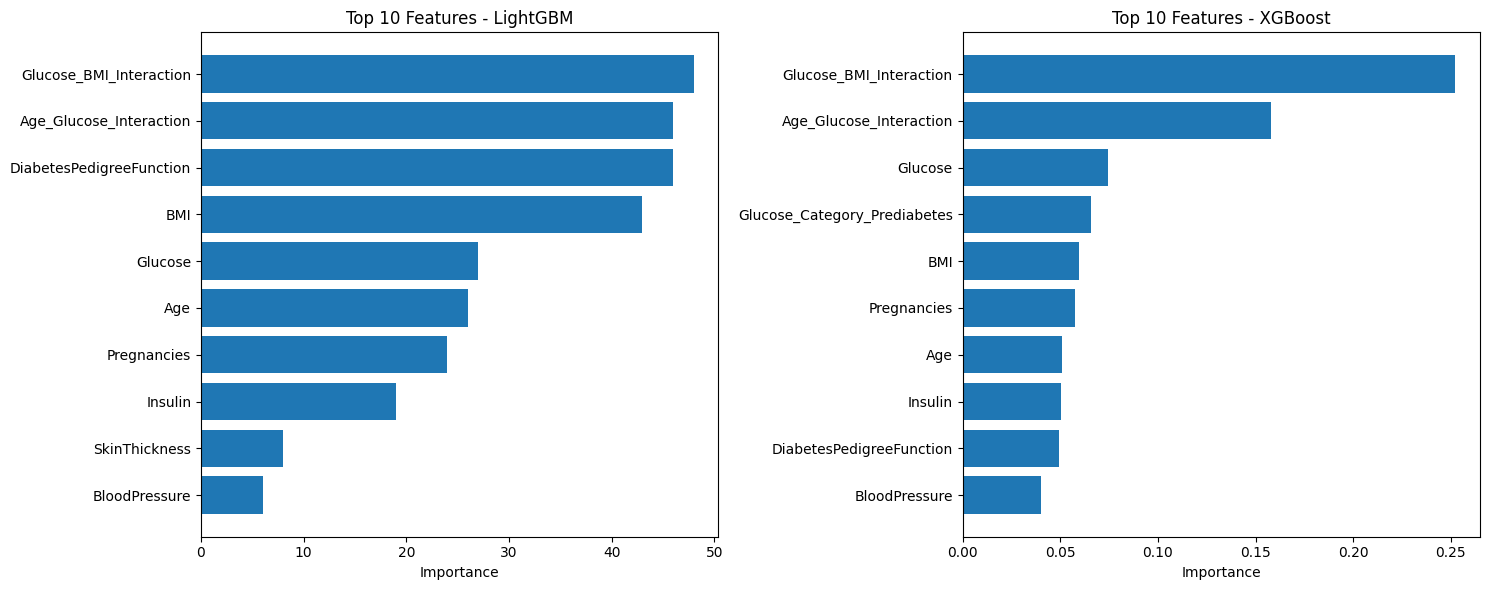

In [32]:
# Create comparison dataframe
comparison_data = {
    'Model': ['LightGBM', 'LightGBM (Tuned)', 'XGBoost', 'XGBoost (Tuned)'],
    'Accuracy': [accuracy_lgb, accuracy_lgb_tuned, accuracy_xgb, accuracy_xgb_tuned],
    'Precision': [precision_lgb, precision_score(y_test, y_pred_lgb_tuned),
                  precision_xgb, precision_score(y_test, y_pred_xgb_tuned)],
    'Recall': [recall_lgb, recall_score(y_test, y_pred_lgb_tuned),
               recall_xgb, recall_score(y_test, y_pred_xgb_tuned)],
    'F1-Score': [f1_lgb, f1_score(y_test, y_pred_lgb_tuned),
                 f1_xgb, f1_score(y_test, y_pred_xgb_tuned)],
    'AUC-ROC': [auc_lgb, roc_auc_score(y_test, best_lgb.predict_proba(X_test)[:, 1]),
                auc_xgb, roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])]
}

comparison_df = pd.DataFrame(comparison_data)

print("=== Model Comparison ===")
print(comparison_df)

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Accuracy comparison
axes[0,0].bar(comparison_df['Model'], comparison_df['Accuracy'], color=['blue', 'lightblue', 'red', 'pink'])
axes[0,0].set_title('Model Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Precision comparison
axes[0,1].bar(comparison_df['Model'], comparison_df['Precision'], color=['blue', 'lightblue', 'red', 'pink'])
axes[0,1].set_title('Model Precision Comparison')
axes[0,1].set_ylabel('Precision')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Recall comparison
axes[0,2].bar(comparison_df['Model'], comparison_df['Recall'], color=['blue', 'lightblue', 'red', 'pink'])
axes[0,2].set_title('Model Recall Comparison')
axes[0,2].set_ylabel('Recall')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. F1-Score comparison
axes[1,0].bar(comparison_df['Model'], comparison_df['F1-Score'], color=['blue', 'lightblue', 'red', 'pink'])
axes[1,0].set_title('Model F1-Score Comparison')
axes[1,0].set_ylabel('F1-Score')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. AUC-ROC comparison
axes[1,1].bar(comparison_df['Model'], comparison_df['AUC-ROC'], color=['blue', 'lightblue', 'red', 'pink'])
axes[1,1].set_title('Model AUC-ROC Comparison')
axes[1,1].set_ylabel('AUC-ROC')
axes[1,1].tick_params(axis='x', rotation=45)

# 6. ROC Curves
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, best_lgb.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, best_xgb.predict_proba(X_test)[:, 1])

axes[1,2].plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {comparison_df.loc[1, "AUC-ROC"]:.3f})', linewidth=2)
axes[1,2].plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {comparison_df.loc[3, "AUC-ROC"]:.3f})', linewidth=2)
axes[1,2].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1,2].set_xlabel('False Positive Rate')
axes[1,2].set_ylabel('True Positive Rate')
axes[1,2].set_title('ROC Curves')
axes[1,2].legend()
axes[1,2].grid(True)

plt.tight_layout()
plt.show()

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# LightGBM confusion matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb_tuned)
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('LightGBM Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# XGBoost confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb_tuned)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('XGBoost Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Feature importance comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# LightGBM feature importance
lgb_importance_tuned = pd.DataFrame({
    'feature': X.columns,
    'importance': best_lgb.feature_importances_
}).sort_values('importance', ascending=True).tail(10)

axes[0].barh(lgb_importance_tuned['feature'], lgb_importance_tuned['importance'])
axes[0].set_title('Top 10 Features - LightGBM')
axes[0].set_xlabel('Importance')

# XGBoost feature importance
xgb_importance_tuned = pd.DataFrame({
    'feature': X.columns,
    'importance': best_xgb.feature_importances_
}).sort_values('importance', ascending=True).tail(10)

axes[1].barh(xgb_importance_tuned['feature'], xgb_importance_tuned['importance'])
axes[1].set_title('Top 10 Features - XGBoost')
axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.show()